Imports

In [38]:
import requests 
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers

download data

In [ ]:

url ='https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/nx9xbs4rgx-2.zip'
save_path ="dataset"
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/nx9xbs4rgx-2.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('dataset')

Load images from file 

In [18]:
data_dir = pathlib.Path("dataset")

In [19]:
image_count = len(list(data_dir.glob('*/*.JPG')))
print(image_count)

3832


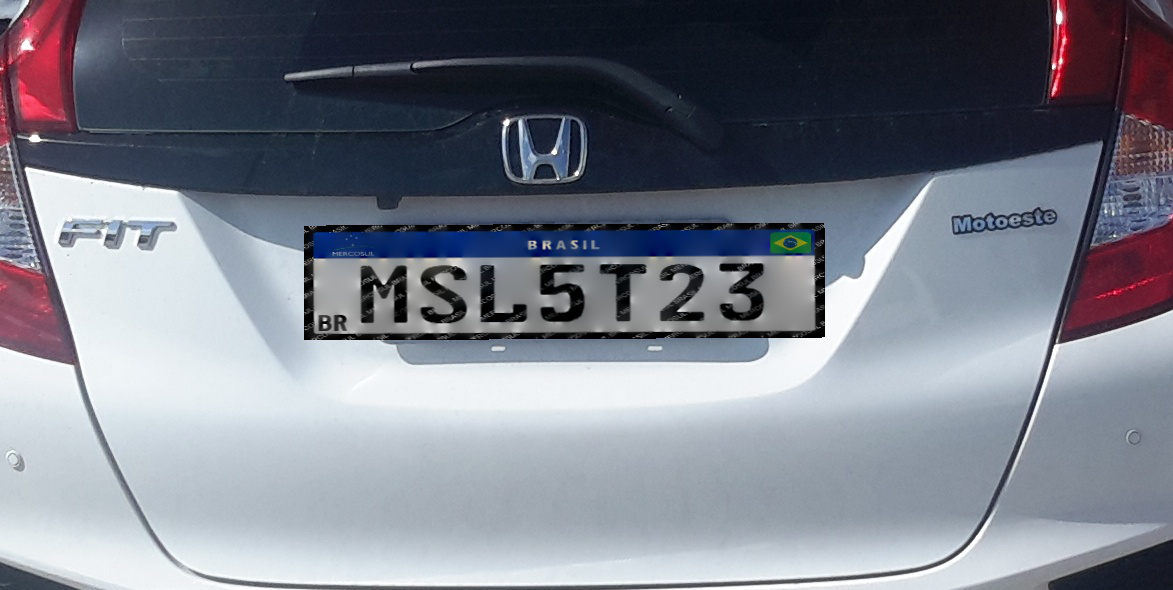

In [20]:
plates = list(data_dir.glob('images/*'))
PIL.Image.open(str(plates[50]))

In [26]:
train_data =tf.keras.utils.image_dataset_from_directory("dataset",seed =123,subset ="training",validation_split=0.2)

Found 3832 files belonging to 1 classes.
Using 3066 files for training.


In [27]:
validation_data =tf.keras.utils.image_dataset_from_directory("dataset",seed =123,subset ="validation",validation_split=0.2)

Found 3832 files belonging to 1 classes.
Using 766 files for validation.


In [28]:
train_data.class_names

['Number_plates']

Visualize the data

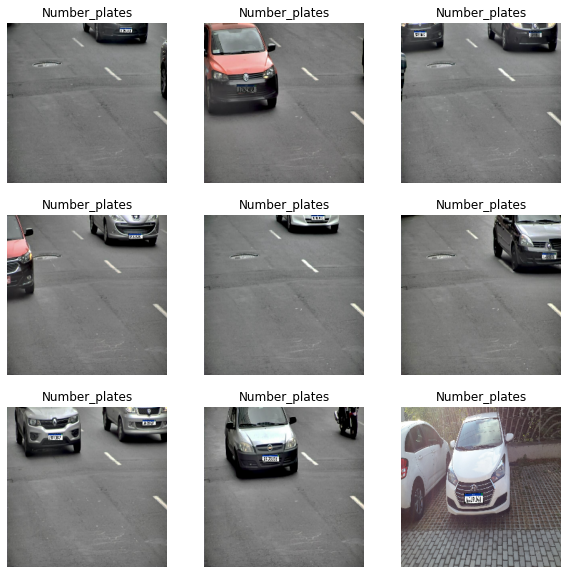

In [32]:
class_names = train_data.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [39]:
normalization_layer = layers.Rescaling(1./255)

In [41]:
train_data, val_data, test_data = tf.keras.

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: dataset\Number_plates\monitoring_system_1187.JPG : The system cannot find the path specified.
; No such process
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]